# Captchas

[This](https://medium.com/@oneironaut.oml/solving-captchas-with-deeplearning-part-1-multi-label-classification-b9f745c3a599) article explains what's going in this kernel.

In [1]:
from fastai.vision import *
import os

path = Path(r'../input/samples/')
print(os.listdir(path/'samples')[:10])

['bny23.png', 'bx5ed.jpg', '865wm.png', 'mddgb.png', 'nn6w6.jpg', 'pym7p.png', '8xef7.png', 'nwg2m.png', 'x362g.png', 'gn2xy.png']


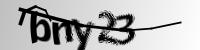

In [2]:
from IPython.display import Image
Image(filename='../input/samples/samples/bny23.png')

## Multilabel Classification

In [3]:
def label_from_filename(path):
    label = [char for char in path.name[:-4]]
    return label

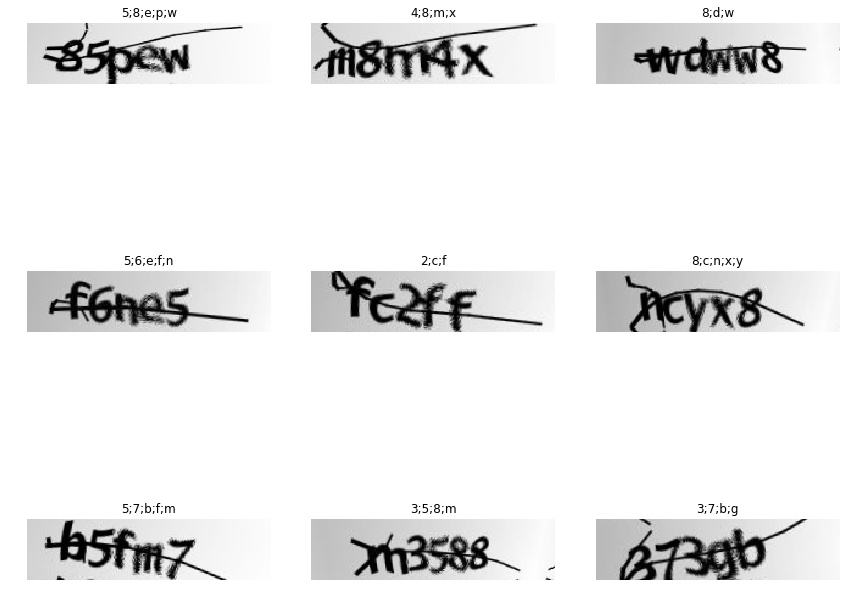

In [4]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_func(label_from_filename)
        .transform(get_transforms(do_flip=False))
        .databunch()
        .normalize()
       )
data.show_batch(3)

In [5]:
acc_02 = partial(accuracy_thresh, thresh=0.2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 92834288.55it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


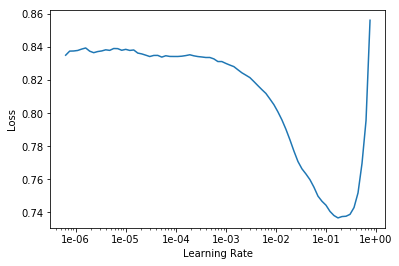

In [6]:
learn = learn = cnn_learner(data, models.resnet18, model_dir='/tmp', metrics=acc_02)
lr_find(learn)
learn.recorder.plot()

In [7]:
lr = 5e-2
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.719122,1.070827,0.636990,00:03
1,0.637902,0.935334,0.680275,00:03
2,0.587261,0.642835,0.603050,00:03
3,0.541605,0.465183,0.727988,00:03
4,0.508088,0.413684,0.720364,00:03


In [8]:
import copy
losses = copy.deepcopy(learn.recorder.losses)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


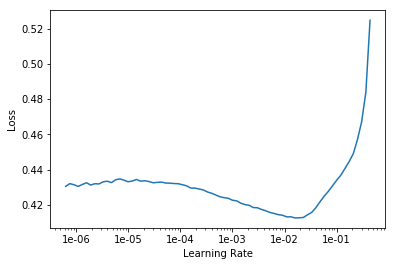

In [9]:
learn.unfreeze()
lr_find(learn)
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(15, slice(1e-3, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.428042,0.408861,0.740531,00:03
1,0.411420,0.468618,0.729956,00:03
2,0.389546,0.513824,0.731185,00:03
3,0.364548,0.688193,0.766109,00:03
4,0.334038,0.489871,0.811363,00:03
5,0.301841,0.352192,0.847270,00:03
6,0.267224,0.287512,0.886621,00:03
7,0.234301,0.207906,0.907280,00:03
8,0.204379,0.128377,0.942204,00:03
9,0.176942,0.089245,0.961633,00:03


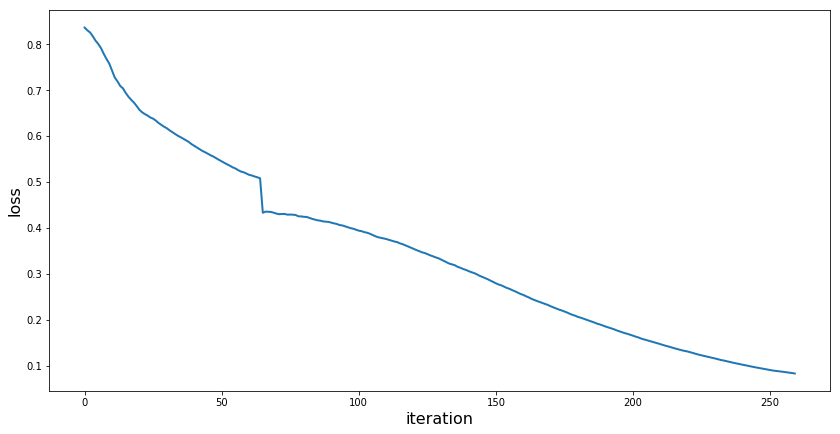

In [11]:
losses += learn.recorder.losses

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(losses, linewidth=2)
ax.set_ylabel('loss', fontsize=16)
ax.set_xlabel('iteration', fontsize=16)
plt.show()